# 4.5.1 실습 - 국민건강보험공단 건강검진정보 데이터

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams["font.family"] = 'NanumGothic'
df = pd.read_csv("국민건강보험공단_건강검진정보_20191231.csv", encoding = 'euc-kr')

In [2]:
df.head()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0  2019         1    11     1            13        165          65  90.0   
1  2019         2    48     2             5        155          45  64.0   
2  2019         3    41     1            13        160          70  87.0   
3  2019         4    28     1            12        170          60  85.0   
4  2019         5    41     1            10        170          70  81.2   

   시력(좌)  시력(우)  ...  감마 지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치 유무  치아마모증유무  \
0    1.5    1.2  ...    47.0   2.0   NaN          1      0.0     미시행      미시행   
1    1.2    0.5  ...    13.0   1.0   1.0          0      NaN     미시행      미시행   
2    0.9    0.8  ...    17.0   1.0   1.0          0      NaN     미시행      미시행   
3    0.4    1.2  ...    32.0   2.0   1.0          0      NaN     미시행      미시행   
4    0.7    0.7  ...    19.0   2.0   NaN          0      NaN     미시행      미시행   

   제3대구치(사랑니) 이상   치석  데이터 공개일자  
0            미시행  1.0  20191231  
1            미시행  NaN  20191231  
2            미시행  NaN  20191231  
3            미시행  NaN  20191231  
4            미시행  NaN  20191231  

[5 rows x 34 columns]

In [3]:
df.describe()

기준년도        가입자 일련번호            시도코드            성별코드  \
count  1000000.0  1000000.000000  1000000.000000  1000000.000000   
mean      2019.0   500000.500000       33.712386        1.480426   
std          0.0   288675.278933       12.668197        0.499617   
min       2019.0        1.000000       11.000000        1.000000   
25%       2019.0   250000.750000       27.000000        1.000000   
50%       2019.0   500000.500000       41.000000        1.000000   
75%       2019.0   750000.250000       43.000000        2.000000   
max       2019.0  1000000.000000       50.000000        2.000000   

         연령대 코드(5세단위)       신장(5Cm단위)      체중(5Kg 단위)           허리둘레  \
count  1000000.000000  1000000.000000  1000000.000000  999597.000000   
mean        10.496387      162.307655       63.564490      81.320565   
std          2.964080        9.280317       12.877611      10.523122   
min          5.000000      130.000000       30.000000       3.000000   
25%          8.000000      155.000000       55.000000      74.000000   
50%         11.000000      160.000000       60.000000      81.000000   
75%         13.000000      170.000000       70.000000      88.000000   
max         18.000000      195.000000      145.000000     999.000000   

               시력(좌)          시력(우)  ...        혈청크레아티닌     (혈청지오티)AST  \
count  999805.000000  999812.000000  ...  994474.000000  994478.000000   
mean        0.971909       0.970951  ...       0.860555      26.231107   
std         0.593307       0.600537  ...       0.477701      24.046478   
min         0.100000       0.100000  ...       0.060000       1.000000   
25%         0.700000       0.700000  ...       0.700000      19.000000   
50%         1.000000       1.000000  ...       0.800000      23.000000   
75%         1.200000       1.200000  ...       1.000000      29.000000   
max         9.900000       9.900000  ...      98.000000    7362.000000   

          (혈청지오티)ALT         감마 지티피           흡연상태           음주여부  \
count  994477.000000  994470.000000  999834.000000  644918.000000   
mean       25.996708      36.294294       1.369669       0.999972   
std        27.710895      48.390706       0.482715       0.005283   
min         1.000000       1.000000       1.000000       0.000000   
25%        15.000000      16.000000       1.000000       1.000000   
50%        20.000000      23.000000       1.000000       1.000000   
75%        30.000000      39.000000       2.000000       1.000000   
max      6435.000000     999.000000       2.000000       1.000000   

            구강검진 수검여부        치아우식증유무             치석    데이터 공개일자  
count  1000000.000000  397680.000000  397680.000000   1000000.0  
mean         0.397680       0.210068       0.587523  20191231.0  
std          0.489419       0.407357       0.589261         0.0  
min          0.000000       0.000000       0.000000  20191231.0  
25%          0.000000       0.000000       0.000000  20191231.0  
50%          0.000000       0.000000       1.000000  20191231.0  
75%          1.000000       0.000000       1.000000  20191231.0  
max          1.000000       1.000000       2.000000  20191231.0  

[8 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [5]:
df.drop(['기준년도', '가입자 일련번호', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상', \
         '데이터 공개일자'], inplace=True, axis = 1)

In [6]:
df.rename(columns = {'연령대 코드(5세단위)':'연령코드', '신장(5Cm단위)':'신장', '체중(5Kg 단위)': '체중', \
                     '식전혈당(공복혈당)': '혈당' }, inplace = True)

In [7]:
df = df.dropna()

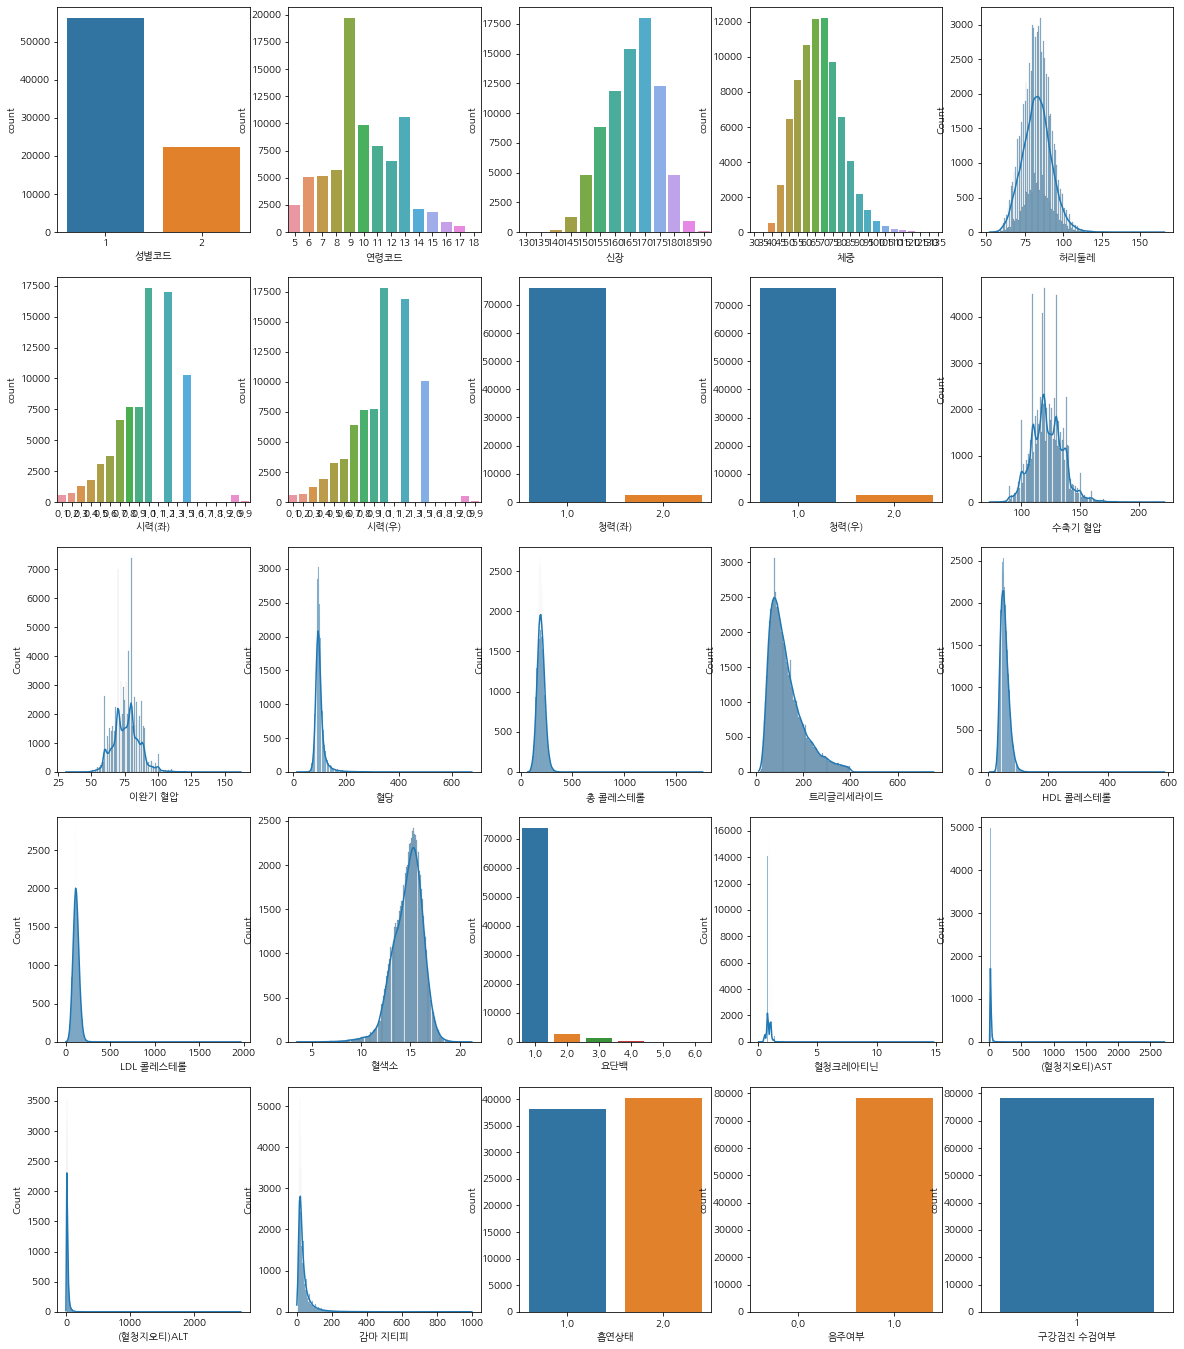

In [8]:
fig, axs = plt.subplots(5, 5)
fig.set_size_inches(20,24)

for i in range(5):
    for j in range(5):
        attr = i * 5 + j + 1
        if df[df.columns[attr]].nunique() < 30:
            sns.countplot( x=df.columns[attr], data=df,ax=axs[i][j])
        else:
            sns.histplot( x=df.columns[attr], data=df, kde=True, ax=axs[i][j])

In [9]:
df['음주여부'].value_counts()

1.0    78481
0.0        4
Name: 음주여부, dtype: int64

<AxesSubplot:xlabel='수축기 혈압', ylabel='이완기 혈압'>

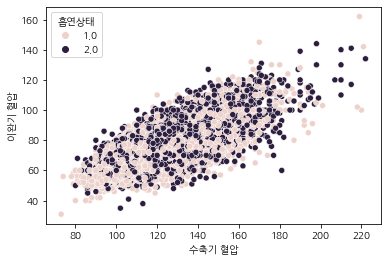

In [10]:
sns.scatterplot(x=df['수축기 혈압'], y=df['이완기 혈압'], hue=df['흡연상태'])

<AxesSubplot:xlabel='신장', ylabel='체중'>

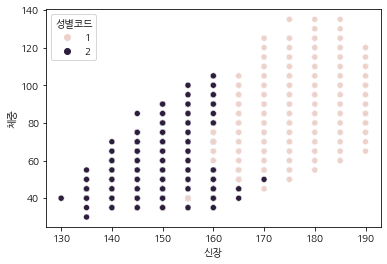

In [11]:
sns.scatterplot(x=df['신장'], y=df['체중'], hue=df['성별코드'])

<AxesSubplot:xlabel='혈당', ylabel='총 콜레스테롤'>

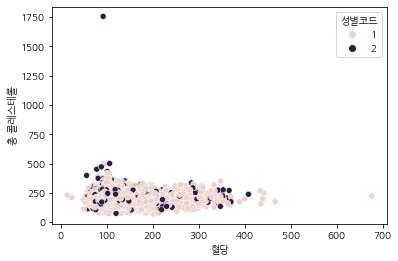

In [12]:
sns.scatterplot(x=df['혈당'], y=df['총 콜레스테롤'], hue=df['성별코드'])

<AxesSubplot:xlabel='연령코드', ylabel='총 콜레스테롤'>

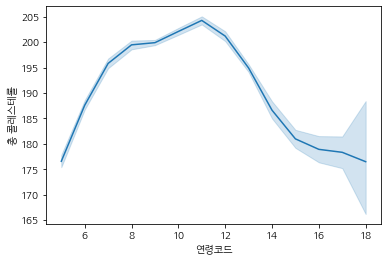

In [13]:
sns.lineplot(x=df['연령코드'], y=df['총 콜레스테롤'])

<AxesSubplot:xlabel='연령코드', ylabel='혈색소'>

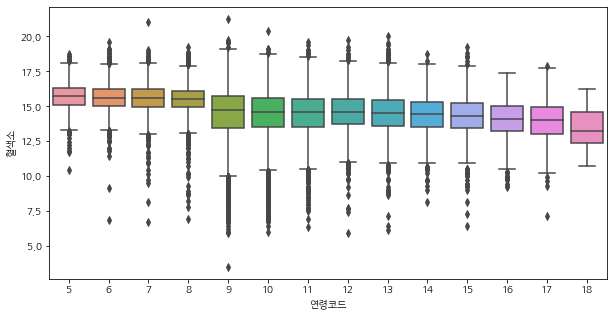

In [14]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x=df['연령코드'], y=df['혈색소'])

<AxesSubplot:xlabel='연령코드', ylabel='혈당'>

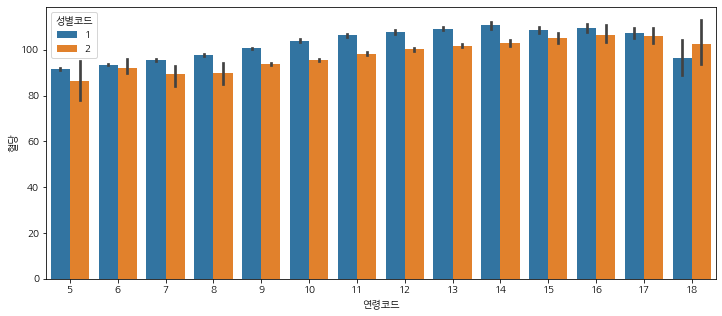

In [15]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x=df['연령코드'], y=df['혈당'], hue=df['성별코드'])

<AxesSubplot:xlabel='연령코드', ylabel='허리둘레'>

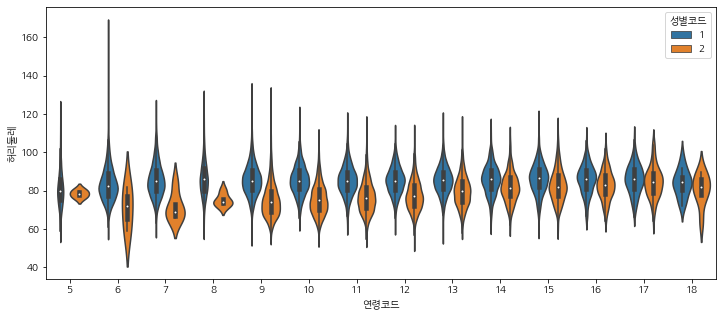

In [16]:
fig = plt.figure(figsize=(12,5))
sns.violinplot(x=df['연령코드'], y=df['허리둘레'], hue=df['성별코드'])

<AxesSubplot:xlabel='연령코드', ylabel='시도코드'>

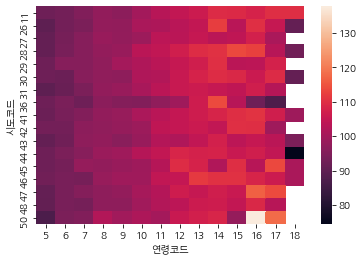

In [17]:
pivot_df = df.pivot_table("혈당", "시도코드", "연령코드")
sns.heatmap(pivot_df)